### entroport examples

In [2]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

from entroport import EntroPort

#### Get som arbitrary fund data from vanguard and fidelity

In [85]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 1, 1)

f = data.DataReader(['VTI', 'VGSTX', 'VWELX', 'VFIIX', 'VPMCX',
                    'FBALX', 'FDGRX', 'FCNTX', 'FLPSX', 'FBGRX'],
                    'yahoo', start, end)

fsp = data.DataReader('^GSPC','yahoo', start, end) # S&P 500                          
fsp = fsp['Adj Close'].pct_change().iloc[1:]
rets = f['Adj Close'].pct_change().iloc[1:]
rets = rets.apply(lambda x: np.log(1 + x))

#### Construct a model object with an estimation window of 500 observations and a step size of 12 observations (i.e rebalancing every 12 days)

(the docstring has more info)

In [103]:
ep = EntroPort(rets, 500, 12).fit()

#### Have a look at the cumulative return

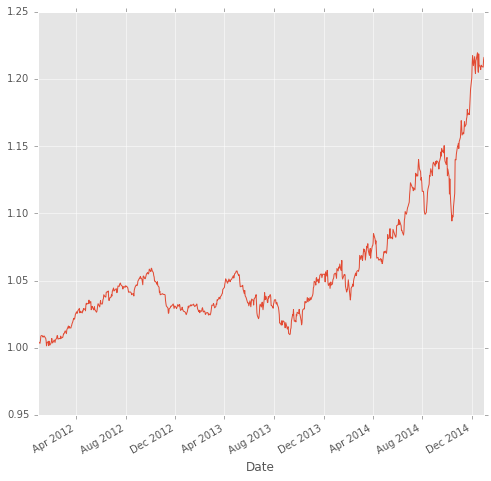

In [112]:
(ep.pfs_['ip'] + 1).cumprod().plot(figsize=(8, 8))

#### Does not look particularly good compared to the S&P 500

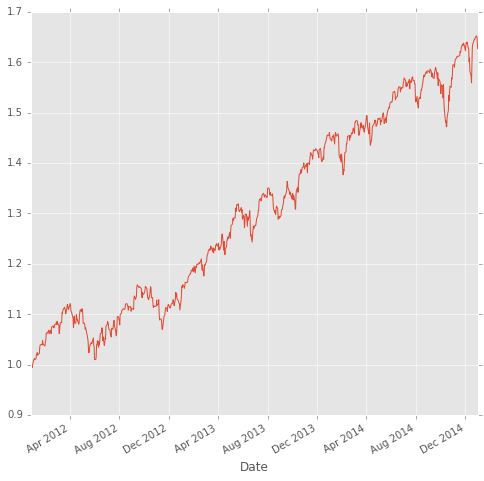

In [111]:
(fsp[ep.pfs_.index[0]:] + 1).cumprod().plot(figsize=(8, 8))

#### The estimated weights (only point estimates are stored) are rather noisy

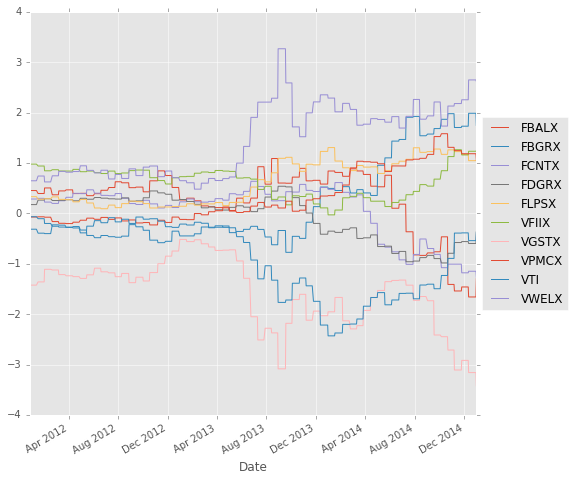

In [124]:
ep.weights_.plot(figsize=(8, 8)).legend(loc='center left', bbox_to_anchor=(1, .5))

#### The estimated $\theta$'s

(the *argmin* of $\frac{1}{T} \sum_{t=1}^{T}e^{\theta_i \mathbf{R}_t} $)

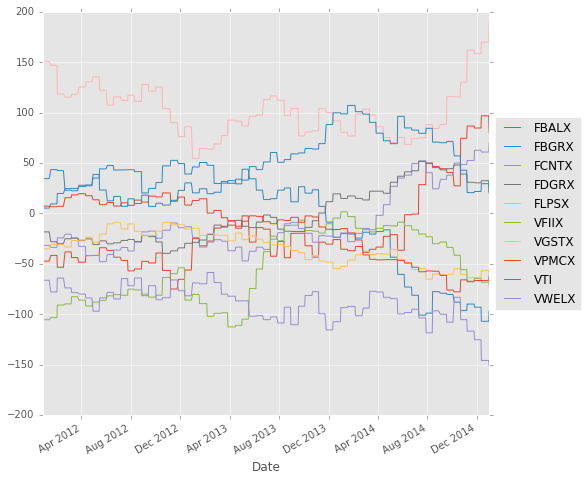

In [122]:
ep.thetas_.plot(figsize=(8, 8)).legend(loc='center left', bbox_to_anchor=(1, .5))